### Imports and Inputs

In [1]:
# import required libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from keplergl import KeplerGl

sns.set_style('darkgrid')

In [2]:
# set inputs and directories
DATA_DIR = '../../data/commodity-frontiers'
OUT_DIR = '../../output/commodity-frontiers'

# read files
crushing = pd.read_csv(os.path.join(DATA_DIR, 'crushing_facilities.csv'))
refining = pd.read_csv(os.path.join(DATA_DIR, 'refining_facilities.csv'))
storage = pd.read_csv(os.path.join(DATA_DIR, 'storage_facilities.csv'))

### Data Exploration

#### Crushing Facilities

In [3]:
crushing.head()

,the_geom,year_date,cartodb_id,the_geom_webmercator,year,cf,company,geocode,municipality,uf,status,capacity,capacity_source,cnpj,lat,long,resolution
0,0101000020E6100000923B1169C0D449C0779BDC9497F7...,2005-01-01,280,0101000020110F0000D6F59A4636F055C1406FFF3A9F21...,2005,CF038,SINA,3547700,SANTO ANASTACIO,SP,ATIVA,500.0,NaN,06.348.804/0001-62,-21.967157,-51.662122,POINT
1,0101000020E6100000923B1169C0D449C0779BDC9497F7...,2006-01-01,281,0101000020110F0000D6F59A4636F055C1406FFF3A9F21...,2006,CF038,SINA,3547700,SANTO ANASTACIO,SP,ATIVA,500.0,NaN,06.348.804/0001-62,-21.967157,-51.662122,POINT
2,0101000020E6100000B936548CF31348C058CA32C4B1AE...,2010-01-01,1,0101000020110F0000EFB855BB0B7354C19F550F8EE527...,2010,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,NaN,00.969.790/0005-41,-18.682400,-48.155870,POINT
3,0101000020E6100000B936548CF31348C058CA32C4B1AE...,2011-01-01,2,0101000020110F0000EFB855BB0B7354C19F550F8EE527...,2011,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,http://www.abiove.org.br/site/_FILES/Portugues...,00.969.790/0005-41,-18.682400,-48.155870,POINT
4,0101000020E6100000B936548CF31348C058CA32C4B1AE...,2012-01-01,3,0101000020110F0000EFB855BB0B7354C19F550F8EE527...,2012,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,NaN,00.969.790/0005-41,-18.682400,-48.155870,POINT


In [4]:
# remove unnecessary columns 
crushing.drop(['the_geom', 'the_geom_webmercator'], axis=1)

,year_date,cartodb_id,year,cf,company,geocode,municipality,uf,status,capacity,capacity_source,cnpj,lat,long,resolution
0,2005-01-01,280,2005,CF038,SINA,3547700,SANTO ANASTACIO,SP,ATIVA,500.0,NaN,06.348.804/0001-62,-21.967157,-51.662122,POINT
1,2006-01-01,281,2006,CF038,SINA,3547700,SANTO ANASTACIO,SP,ATIVA,500.0,NaN,06.348.804/0001-62,-21.967157,-51.662122,POINT
2,2010-01-01,1,2010,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,NaN,00.969.790/0005-41,-18.682400,-48.155870,POINT
3,2011-01-01,2,2011,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,http://www.abiove.org.br/site/_FILES/Portugues...,00.969.790/0005-41,-18.682400,-48.155870,POINT
4,2012-01-01,3,2012,CF001,SELECTA,3103504,ARAGUARI,MG,ATIVA,2000.0,NaN,00.969.790/0005-41,-18.682400,-48.155870,POINT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2016-01-01,973,2016,CF145,ADM,5210109,IPAMERI,GO,ATIVA,1200.0,NaN,02.003.402/0090-40,-17.256418,-47.690804,POINT
969,2013-01-01,918,2013,CF127,PRODUCAMPO,5103403,CUIABA,MT,ATIVA,NaN,NaN,08.707.604/0001-84,-15.674937,-55.971105,POINT
970,2014-01-01,919,2014,CF127,PRODUCAMPO,5103403,CUIABA,MT,ATIVA,NaN,NaN,08.707.604/0001-84,-15.674937,-55.971105,POINT
971,2015-01-01,920,2015,CF127,PRODUCAMPO,5103403,CUIABA,MT,ATIVA,NaN,NaN,08.707.604/0001-84,-15.674937,-55.971105,POINT


In [5]:
# provincial diversity
crushing['uf'].value_counts()

PR    219
RS    194
GO    146
MT    117
SP     84
MS     54
MG     43
BA     31
SC     28
PI     24
AM     12
MA     10
RO      6
PE      3
TO      2
Name: uf, dtype: int64

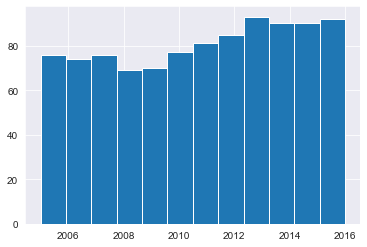

In [6]:
# visualize years
max_yr = crushing['year'].max()
min_yr = crushing['year'].min()
crushing['year'].hist(bins=max_yr-min_yr+1)

#### Storage Facilities

In [7]:
# explore first 10 rows
storage.head(10)

,the_geom,cartodb_id,the_geom_webmercator,cnpj,company,capacity,uf,municipality,geocode,lat,long,resolution,dt,date,subclass
0,0101000020E6100000EDBB22F8DF124AC078280AF489B4...,365,0101000020110F0000880D602CF92456C1F6C778E38290...,025.900.931-87,ALONSO CHAVES DE MORAIS,33780,GO,JATAI,5211909,-17.705230,-52.147460,POINT,b1.5,NaN,CONFIRMED STORAGE
1,0101000020E610000034D769A4A55A4AC02159C0046E9D...,620,0101000020110F0000EF0187F0ED6156C12A7E8B1663CF...,053.134.068-68,JOSÉ PEDRO TONIELLO,21560,MT,CANARANA,5102702,-13.307480,-52.708180,POINT,b1.5,NaN,CONFIRMED STORAGE
2,0101000020E6100000D0B87020240347C0FAF202ECA333...,669,0101000020110F00003BB9D516598B53C13AEA7CB092B9...,06.855.894/0004-20,RISA S/A,76541,MA,BALSAS,2101400,-7.550430,-46.024540,POINT,b1.5,2003-02-11,CONFIRMED STORAGE
3,0101000020E6100000F163CC5D4BA04CC0A4C2D84290E3...,778,0101000020110F000094DF7E38EC4F58C176C9AD5B65EC...,073.617.808-22,NEIDE KIYOMI ODASHIRO,32428,MT,DIAMANTINO,5103502,-13.944460,-57.252300,POINT,b1.5,NaN,CONFIRMED STORAGE
4,0101000020E610000017F19D98F5024CC026C79DD2C11A...,1216,0101000020110F0000B52B3A4C4CCA57C126B2ED98707E...,204.101.310-91,SADI ZONTA,3400,MT,SORRISO,5107925,-12.552260,-56.023120,POINT,b1.5,NaN,CONFIRMED STORAGE
5,0101000020E610000043FF04172BBA4BC01618B2BAD593...,1907,0101000020110F0000A44279017A8C57C124A6B07B03C7...,756.160.339-87,EDSON KNAUT,5610,MT,SORRISO,5107925,-13.288740,-55.454440,POINT,b1.5,NaN,CONFIRMED STORAGE
6,0101000020E610000032207BBDFB0F47C0C49448A29731...,1953,0101000020110F0000ACC1A442419653C1FA29F96096D5...,764.619.049-72,ELOI PILLATI,6140,BA,FORMOSA DO RIO PRETO,2911105,-11.596860,-46.124870,POINT,b1.5,NaN,CONFIRMED STORAGE
7,0101000020E6100000C47C7901F66D47C007B13385CE1B...,2292,0101000020110F0000B8BCEEF311E653C1553A2818562B...,89.096.457/0016-31,SLC AGRICOLA S.A.,84245,MA,BALSAS,2101400,-8.554310,-46.859070,POINT,"b1.4, b1.5",1997-10-30,CONFIRMED STORAGE
8,0101000020E61000006ABC749318344AC07B4CE52B4843...,2688,0101000020110F00005DC97423304156C13CBC1DFC720A...,95.071.395/0001-20,TONIAL CEREAIS LTDA,18580,RS,PASSO FUNDO,4314100,-28.262820,-52.407000,CEP,b1.5,1993-03-18,CONFIRMED STORAGE
9,0101000020E610000065D8B17C436B4BC002515A7B2A25...,2875,0101000020110F0000A38E0A7A764957C1B9BDF45A624B...,086.954.150-15,JOSE VALENTIN VENTURINI,2960,MS,DOURADOS,5003702,-22.145179,-54.837997,CENTROID,b1.5,NaN,CONFIRMED STORAGE


In [8]:
# most common companies
storage['company'].value_counts()

COAMO AGROINDUSTRIAL COOPERATIVA        106
BUNGE ALIMENTOS S/A                      69
CARGILL AGRICOLA S A                     65
C.VALE - COOPERATIVA AGROINDUSTRIAL      50
INTEGRADA COOPERATIVA AGROINDUSTRIAL     44
                                       ... 
CICERO PASSOS DE LACERDA                  1
JOSE PAULO GONCALVES                      1
ARI TORREMOCHA FIM                        1
HENRY POSSAMAI                            1
ADIL ARLINDO MANJABOSCO                   1
Name: company, Length: 1971, dtype: int64

In [9]:
## DATA CLEANING

# remove unnecessary columns
storage = storage.drop(['the_geom', 'the_geom_webmercator', 'dt'], axis=1)

# convert to datetime format
storage['date'] = pd.to_datetime(storage['date'])

In [10]:
storage['date'] = storage['date'].fillna(0)

#### Refining Facilities

In [11]:
# explore first 10 rows
refining.head(10)

,the_geom,cartodb_id,the_geom_webmercator,id,company,year,capacity,state,municipality,geocode,lat,long,resolution
0,0101000020E6100000AFCDC4D5FF204AC0B927C1C5B1A4...,127,0101000020110F000067521721F83056C1A5815E64F871...,RF127,OLFAR,2016,NaN,RS,ERECHIM,4307005,-27.643338,-52.257807,MUNICIPALITY
1,0101000020E6100000DFBCE397BD574BC03A63FDFBC38D...,1,0101000020110F000063CD93C3E13857C112AA1BAB8E84...,RF001,ADM,2013,NaN,MT,RONDONÓPOLIS,5107602,-16.553772,-54.685473,MUNICIPALITY
2,0101000020E6100000B82ECD5B762A48C0A152C3071C07...,2,0101000020110F0000118FA7162A8654C16181E6E93E77...,RF002,ADM,2013,NaN,MG,UBERLÂNDIA,3170206,-19.027771,-48.331737,MUNICIPALITY
3,0101000020E61000009215F4D0F51F4BC0B990F06EC5E9...,3,0101000020110F00005A69DEF1810957C1EB8512F46B2B...,RF003,ADM,2013,NaN,MS,CAMPO GRANDE,5002704,-20.913169,-54.249689,MUNICIPALITY
4,0101000020E61000007AD516C6ECCB49C001C541ACEA26...,4,0101000020110F00004D436B2AB7E855C172709CA6A6F9...,RF004,ADM,2013,NaN,SC,JOAÇABA,4209003,-27.152018,-51.593163,MUNICIPALITY
5,0101000020E6100000B82ECD5B762A48C0A152C3071C07...,5,0101000020110F0000118FA7162A8654C16181E6E93E77...,RF005,ALGAR AGRO,2013,NaN,MG,UBERLÂNDIA,3170206,-19.027771,-48.331737,MUNICIPALITY
6,0101000020E61000008E1DCEE20F9747C095B59A6EB879...,6,0101000020110F0000C2A06330FA0854C1D3DB354F57AE...,RF006,ALGAR AGRO,2013,NaN,MA,PORTO FRANCO,2109007,-6.368868,-47.180172,MUNICIPALITY
7,0101000020E6100000FAC54D87D37649C09827BF316348...,7,0101000020110F000019F136F370A055C1F4C24434B26B...,RF007,AGROVIGNA,2013,NaN,SP,RANCHARIA,3542206,-22.282764,-50.928330,MUNICIPALITY
8,0101000020E6100000F654E652F2F347C0860BB2DEA7B2...,8,0101000020110F0000F75F4939DD5754C180A461C458F9...,RF008,BREJEIRO,2013,NaN,SP,ORLÂNDIA,3534302,-20.697874,-47.905833,MUNICIPALITY
9,0101000020E610000035D114CF9E7C48C0BBA117ED634A...,9,0101000020110F000047FB84F4F0CB54C1957343093F0D...,RF009,BREJEIRO,2013,NaN,GO,ANÁPOLIS,5201108,-16.290587,-48.973596,MUNICIPALITY


In [12]:
# DATA CLEANING

# remove unnecessary columns
refining = refining.drop(['the_geom', 'the_geom_webmercator'], axis=1)

# convert year to datetime format
refining['date'] = pd.to_datetime(refining['year'])

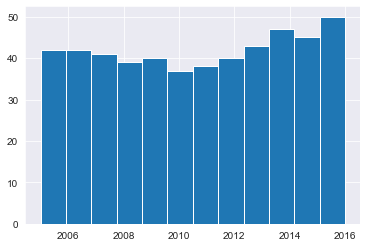

In [13]:
# visualize years
max_yr = refining['year'].max()
min_yr = refining['year'].min()
refining['year'].hist(bins=max_yr-min_yr+1)

## Data Visualization

#### Crushing Facilities

In [14]:
crushing_gdf = gpd.GeoDataFrame(
    crushing, geometry=gpd.points_from_xy(crushing['long'], crushing['lat'])
)
crushing_bounds = crushing_gdf.total_bounds

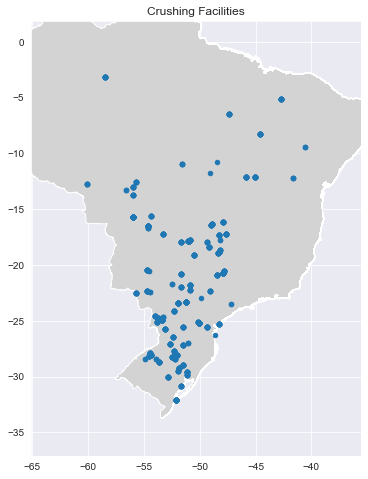

In [15]:
brazil_path = os.path.join(DATA_DIR, 'shp', 'BRA_adm0.shp')
brazil_adm0 = gpd.read_file(brazil_path)

# create matplotlib.pyplot figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# set axis limits using the geodataframes' spatial extent 
ax.set_xlim(crushing_bounds[0] - 5, crushing_bounds[2] + 5) # add 10 degree buffer
ax.set_ylim(crushing_bounds[1] - 5, crushing_bounds[3] + 5) # add 10 degree buffer

# add title
ax.set_title('Crushing Facilities')

# plot
brazil_adm0.plot(ax=ax, color='lightgray')
crushing_gdf.plot(ax=ax, markersize=20)

#### Storage Facilities

In [16]:
storage_gdf = gpd.GeoDataFrame(
    storage, geometry=gpd.points_from_xy(storage['long'], storage['lat'])
)
storage_bounds = storage_gdf.total_bounds

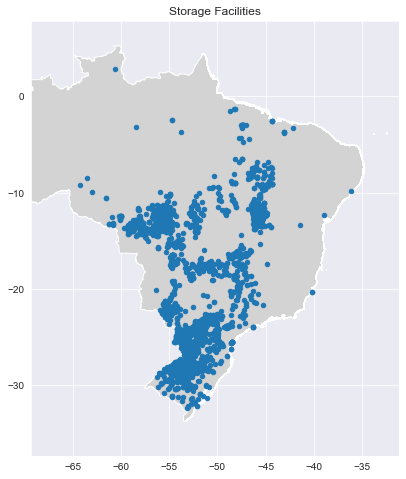

In [17]:
# create matplotlib.pyplot figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# set axis limits using the geodataframes' spatial extent 
ax.set_xlim(storage_bounds[0] - 5, storage_bounds[2] + 5) # add 10 degree buffer
ax.set_ylim(storage_bounds[1] - 5, storage_bounds[3] + 5) # add 10 degree buffer

# add title
ax.set_title('Storage Facilities')

# plot
brazil_adm0.plot(ax=ax, color='lightgray')
storage_gdf.plot(ax=ax, markersize=20)

#### Refining Facilities

In [18]:
refining_gdf = gpd.GeoDataFrame(
    refining, geometry=gpd.points_from_xy(refining['long'], refining['lat'])
)
refining_bounds = refining_gdf.total_bounds

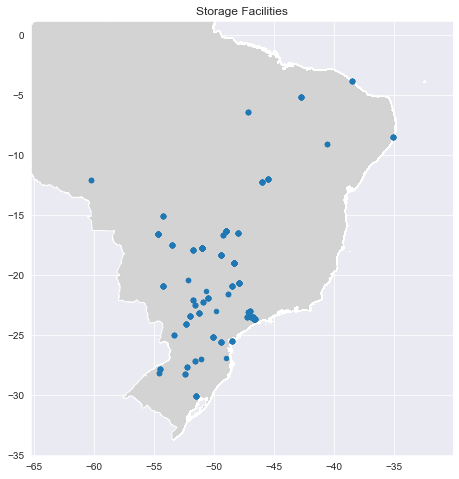

In [19]:
# create matplotlib.pyplot figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# set axis limits using the geodataframes' spatial extent 
ax.set_xlim(refining_bounds[0] - 5, refining_bounds[2] + 5) # add 10 degree buffer
ax.set_ylim(refining_bounds[1] - 5, refining_bounds[3] + 5) # add 10 degree buffer

# add title
ax.set_title('Storage Facilities')

# plot
brazil_adm0.plot(ax=ax, color='lightgray')
refining_gdf.plot(ax=ax, markersize=20)

## Interactive Data Visualization

In [20]:
storage.columns

Index(['cartodb_id', 'cnpj', 'company', 'capacity', 'uf', 'municipality',
       'geocode', 'lat', 'long', 'resolution', 'date', 'subclass', 'geometry'],
      dtype='object')

In [21]:
storage_kepler = storage.drop(['cartodb_id', 'cnpj', 'geocode', 'resolution', 'geometry'], axis=1)

In [22]:
map_1 = KeplerGl()
map_1.add_data(data=storage_kepler, name='storage')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [23]:
map_1

KeplerGl(data={'storage': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

### Export as JSON

In [62]:
# keep relevant columns
crushing_export = crushing[['year_date', 'company', 'uf', 'municipality', 'lat', 'long']]
refining_export = refining[['company', 'state', 'municipality', 'lat', 'long', 'date']]
storage_export = storage[['company', 'capacity', 'uf', 'municipality', 'lat', 'long', 'date', 'subclass']]

In [63]:
# export to json
crushing_export.to_json('crushing.json', orient='records')
refining_export.to_json('refining.json', orient='records')
storage_export.to_json('storage.json', orient='records')